Dream Housing Finance公司处理所有房屋贷款。他们遍布所有城市，半城市和农村地区。在该公司验证客户是否有资格获得贷款后，客户首先申请住房贷款。公司希望根据填写在线申请表时提供的客户详细信息自动化贷款资格流程（实时）。这些详细信息包括性别，婚姻状况，教育，家属人数，收入，贷款金额，信用记录等。

字段说明：
- Loan_ID ：独特的贷款ID
- Gender ：男/女
- Married： 申请人结婚（是/否） (Y/N)
- Dependents： 家属人数
- Education： 申请人学历（研究生/本科生）
- Self_Employed：自雇，个体经营（Y / N）
- ApplicantIncome ：申请人收入
- CoapplicantIncome：共同收入
- LoanAmount：贷款金额数 千
- Loan_Amount_Term：贷款期限 月计
- Credit_History：信用记录
- Property_Area：城市/半城市/乡村
- Loan_Status：贷款批准（是/否）(Y/N)

## 1 加载数据

In [873]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [874]:
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')
train.shape

(614, 13)

In [875]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


数据很少!!!

### 1.1 空值处理

因为数据很少，我们不能删除行了，下面填充下空值，

In [876]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [877]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [878]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [879]:
# 使用众数填充Gender
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [880]:
# 使用众数填充Married
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Dependents']=train['Dependents'].str.replace('+','')  # 注意str

test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Dependents']=test['Dependents'].str.replace('+','')  # 注意str

In [881]:
# 使用众数填充Married
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

In [882]:
# 使用众数填充Dependents
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [883]:
# 使用中位数填充 LoanAmount
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [884]:
# 使用中位数填充 Loan_Amount_Term
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

In [885]:
# 使用众数填充 Credit_History
train['Credit_History'].fillna(train.Credit_History.mode()[0],inplace=True)
train['Credit_History'] = train['Credit_History'].astype('str')

test['Credit_History'].fillna(test.Credit_History.mode()[0],inplace=True)
test['Credit_History'] = test['Credit_History'].astype('str')


In [886]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [887]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [888]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 1.2 特征与目标值分析

In [889]:
train['Loan_yes']=train['Loan_Status'].map(lambda x:1 if x=='Y' else 0)
train['Loan_no']=1-train['Loan_yes']

#### 1.2.1 性别

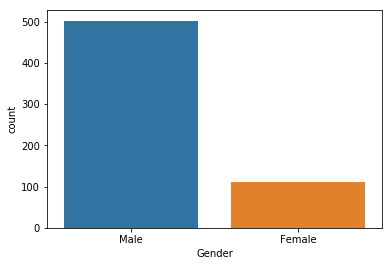

In [890]:
sns.countplot(x='Gender',data=train)
plt.show()

我们可以看出，男性明显居多，是女性的

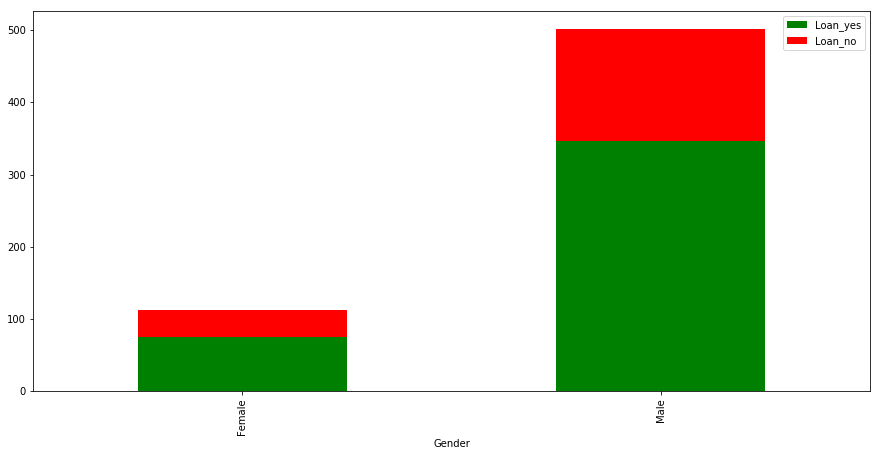

In [891]:
train.groupby('Gender').agg('sum')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

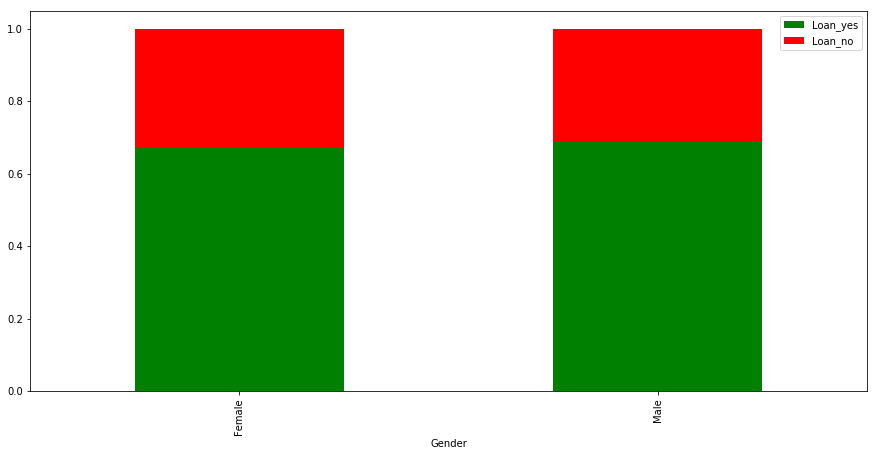

In [892]:
train.groupby('Gender').agg('mean')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

从上图中我们可以看出：虽然数据中男女比例差别很大，但是性别对是否能够获得贷款的影响比较小，男性和女性各有一部分没有获得贷款，并且比例差不多

#### 1.2.2 Married 是否结婚

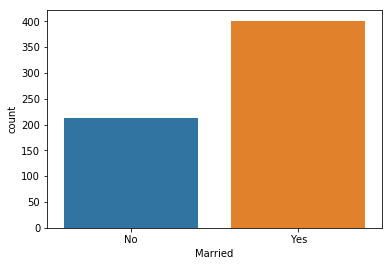

In [893]:
sns.countplot(x='Married',data=train)
plt.show()

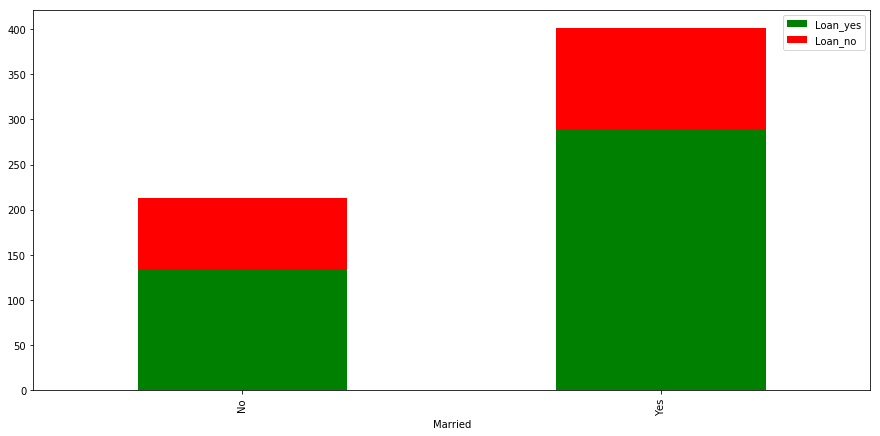

In [894]:
train.groupby('Married').agg('sum')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

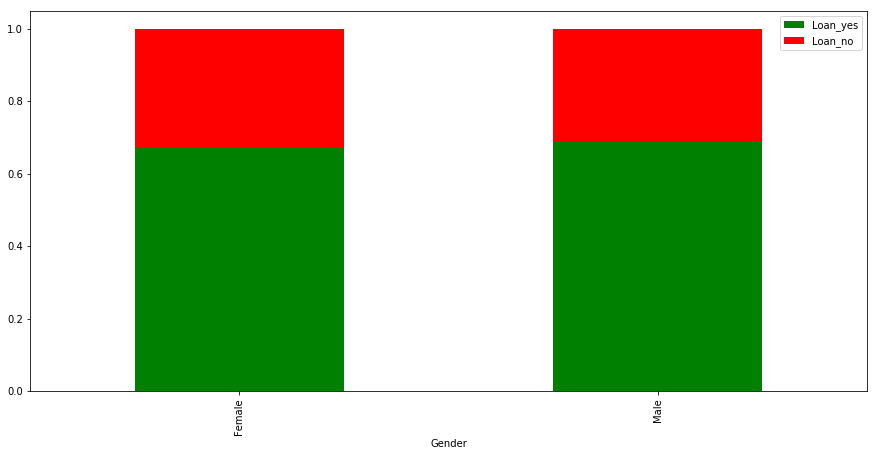

In [895]:
train.groupby('Gender').agg('mean')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

这个和性别差不多，是否结婚对申请贷款没有影响

#### 1.2.3 教育水平

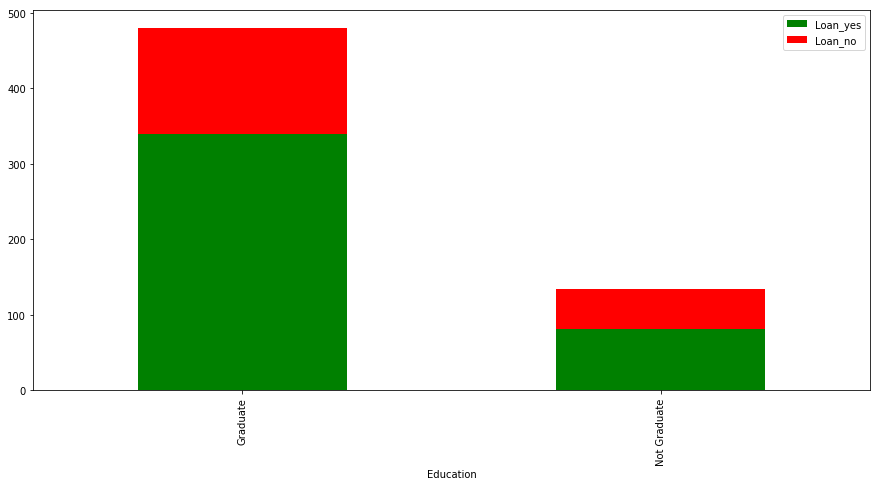

In [896]:
train.groupby('Education').agg('sum')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

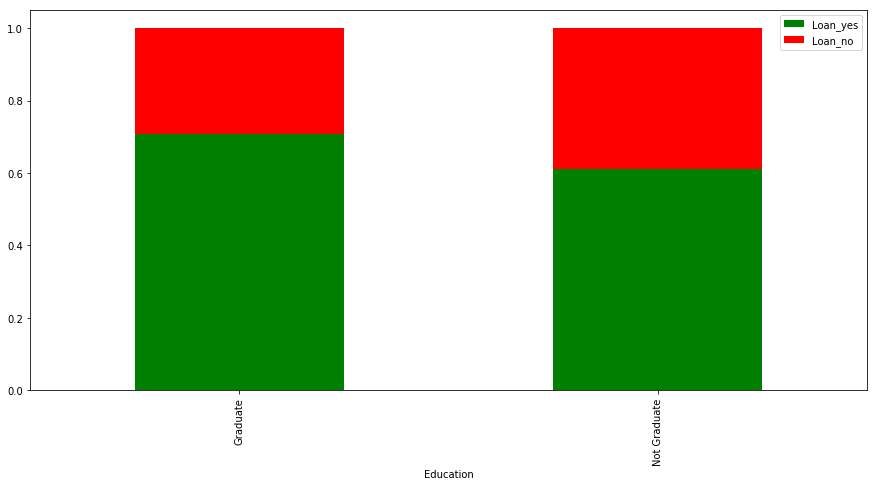

In [897]:
train.groupby('Education').agg('mean')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

我们可以看到如果获得毕业，教育水平较高，申请者更有可能获得贷款

#### 1.2.4 是否个体经营
1 信用记录好

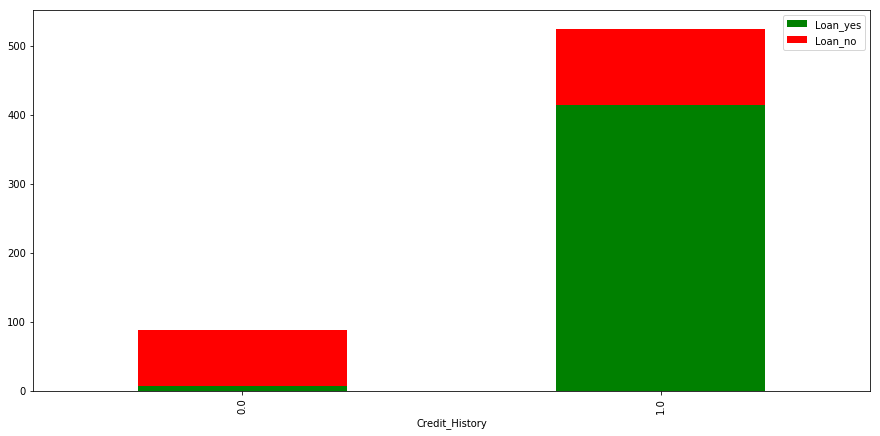

In [898]:
train.groupby('Credit_History').agg('sum')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

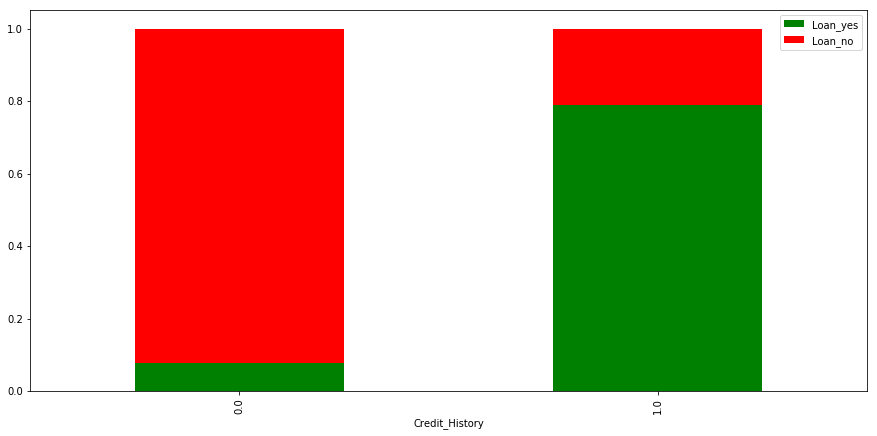

In [899]:
train.groupby('Credit_History').agg('mean')[['Loan_yes','Loan_no']].plot(kind='bar', figsize=(15, 7),
                                                          stacked=True, color=['g', 'r']);

我们可以看到这个是一个区别性比较大的特征，如果没有信用记录，那么很难申请到贷款

#### 1.2.5 收入

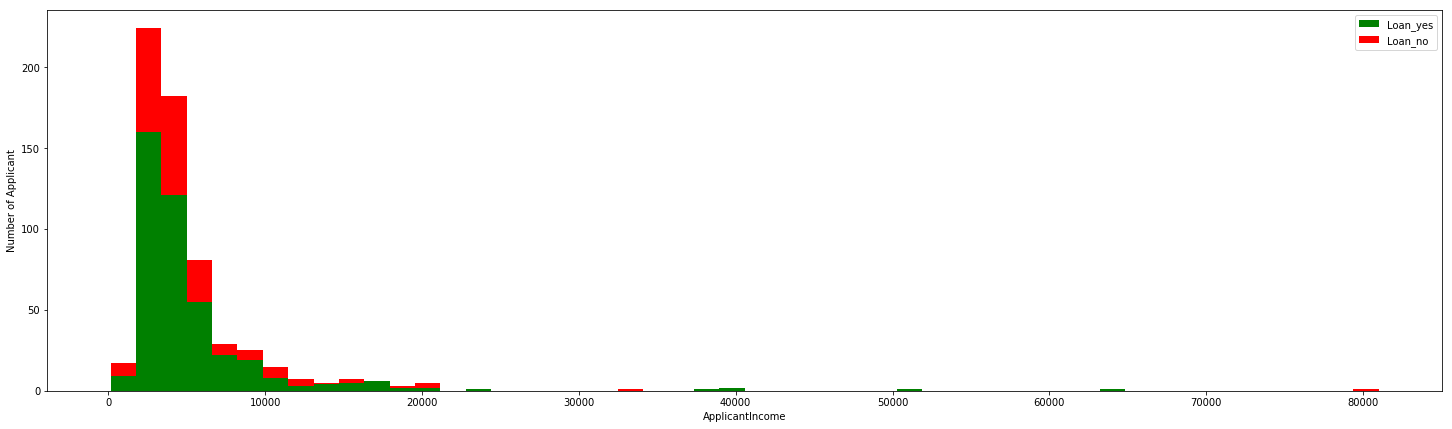

In [900]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['Loan_yes'] == 1]['ApplicantIncome'], train[train['Loan_yes'] == 0]['ApplicantIncome']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Loan_yes','Loan_no'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Number of Applicant')
plt.legend();

我们可以看到，贷款没有通过基本上都存在于低收入的申请者，比如小于20000

### 2 类别编码

In [901]:
from sklearn.preprocessing import LabelEncoder

In [902]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_yes', 'Loan_no'],
      dtype='object')

In [903]:
categorical_cols = ['Gender', 'Married', 'Dependents','Education','Self_Employed',
                    'Credit_History', 'Property_Area']
for var in categorical_cols:
    lb = LabelEncoder()
    full_var_data = pd.concat((train[var], test[var]), axis=0).astype('str')
    train[var] = lb.fit_transform(train[var].astype('str'))
    test[var] = lb.transform(test[var].astype('str'))
train['Loan_Status']=lb.fit_transform(train['Loan_Status'].astype('str'))
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_yes,Loan_no
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,1,0


## 3 建立模型

###  3.1 简单的baseline

In [904]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [905]:
X_train=train.drop(['Loan_ID','Loan_Status','Loan_yes','Loan_no'],axis=1)
y_train=train['Loan_Status']
X_test=test.drop(['Loan_ID'],axis=1)

In [906]:
clf = XGBClassifier(n_estimators=200)
np.mean(cross_val_score(clf, X_train,y_train, cv = 5, scoring='accuracy'))

0.7705446853516658

In [907]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

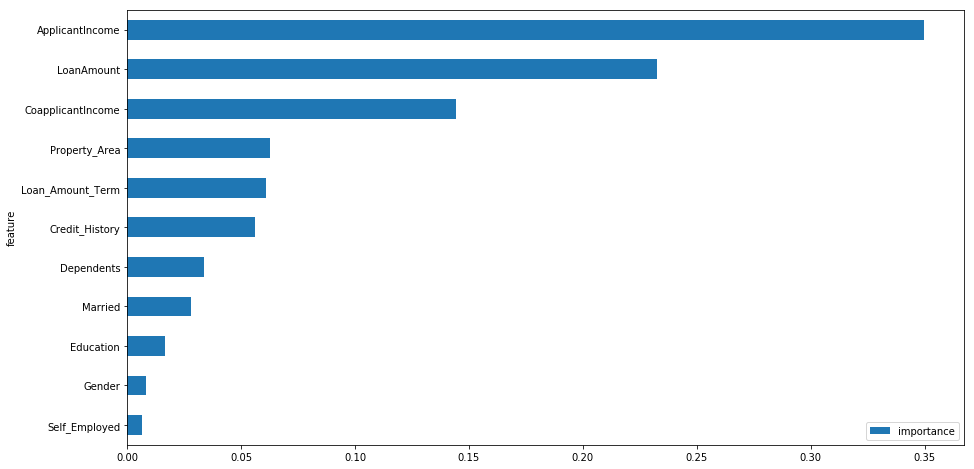

In [908]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(15, 8))

In [914]:
pred=clf.predict(X_test)
test['Loan_Status']=['Y' if p==1 else 'N' for p in pred ]
test[['Loan_ID','Loan_Status']].to_csv('result/submission.csv',index=None)
### 0.7777777778

### 3.2 生成多项式特征

In [910]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [911]:
clf = XGBClassifier(n_estimators=200)
np.mean(cross_val_score(clf, X_train,y_train, cv = 5, scoring='accuracy'))

0.7687995769434162

In [912]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [915]:
pred=clf.predict(X_test)
test['Loan_Status']=['Y' if p==1 else 'N' for p in pred ]
test[['Loan_ID','Loan_Status']].to_csv('result/ploy_submission.csv',index=None)
### 0.7916666